## This notebook aims to test whether our network contains a power-law or not, since the author of the network claimed there is one

In [2]:
import powerlaw 
import networkx as nx
import pandas as pd
import numpy as np

In [3]:
edges = pd.read_csv(r"../../data/edges_updated_reversed.csv", sep=' ') #load the edges
edges_array = np.array(edges.loc[:, ['Source', 'Target']])
nodes = pd.read_csv(r"../../data/nodes.csv", sep=',')
nodes_array = nodes["# index"]
G = nx.DiGraph() #empty DiGraph
G.add_edges_from(edges_array) 
G.add_nodes_from(nodes_array)

In [27]:
print(len(G.edges))
out_degree = np.array([d for n, d in G.out_degree])

72252


In [30]:
out_degree_shifted = out_degree + 1 
out_degree_shifted

array([76,  1,  1, ...,  1,  1,  1], shape=(58742,))

In [31]:
results = powerlaw.Fit(out_degree_shifted, discrete=True)

Calculating best minimal value for power law fit


In [32]:
print(results.power_law.alpha)
print(results.power_law.xmin)

1.9532725349348228
6.0


In [41]:
print(results.distribution_compare('power_law', 'lognormal'))
print(results.distribution_compare('truncated_power_law', 'lognormal'))
print(results.distribution_compare('power_law', 'truncated_power_law'))


(np.float64(-0.3462497559401849), np.float64(0.5379742580706546))
(np.float64(1.8822244728831414), np.float64(0.010227207975829336))
(np.float64(-2.2284742288233383), np.float64(0.0347595402704346))


Assuming nested distributions


In [35]:
R, p

(np.float64(-0.3462497559401849), np.float64(0.5379742580706546))

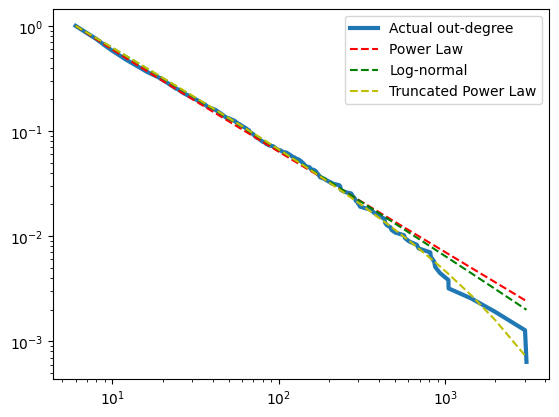

In [59]:
fig4 = results.plot_ccdf(linewidth=3, label="Actual out-degree")
results.power_law.plot_ccdf(ax=fig4, color='r', linestyle='--', label="Power Law")
results.lognormal.plot_ccdf(ax=fig4, color='g', linestyle='--', label="Log-normal")
results.truncated_power_law.plot_ccdf(ax=fig4, color='y', linestyle='--', label='Truncated Power Law')
fig4.legend()

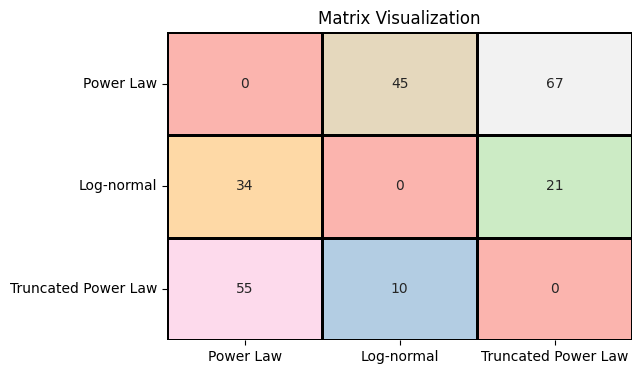

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Your data
data = np.array([[0, -0.3462, 67], 
                 [34, 0, 21], 
                 [55, 10, 0]])
column_labels = ['Power Law', 'Log-normal', 'Truncated Power Law']
row_labels = ['Power Law', 'Log-normal', 'Truncated Power Law']

# 2. Setup the plot
plt.figure(figsize=(6, 4))

# annot=True: shows the numbers
# cbar=False: removes the color scale bar
# cmap="Greys": keeps it professional (or use ["white"] for no color)*
# linewidths: creates the grid lines
sns.heatmap(data, annot=True, fmt="d", cbar=False, 
            cmap="Pastel1", linewidths=2, linecolor='black', xticklabels=column_labels, yticklabels=row_labels)

# 3. Clean up the labels
plt.title("Power Law vs Log-normal vs Truncated Power Law distribution comparisons")
plt.show()

In [55]:
# 1. Power Law vs Lognormal
R_pl_ln, p_pl_ln = results.distribution_compare('power_law', 'lognormal')

# 2. Power Law vs Truncated Power Law
R_pl_tpl, p_pl_tpl = results.distribution_compare('power_law', 'truncated_power_law')

# 3. Lognormal vs Truncated Power Law (The "Tie-Breaker")
R_ln_tpl, p_ln_tpl = results.distribution_compare('lognormal', 'truncated_power_law')

print(f"Lognormal vs Truncated PL: R={R_ln_tpl:.2f}, p={p_ln_tpl:.4f}")
print(f"Power Law vs Lognormal: R={R_pl_ln:.2f}, p={p_pl_ln:.4f}")
print(f"Power Law vs Truncated: R={R_pl_tpl:.2f}, p={p_pl_tpl:.4f}")

Lognormal vs Truncated PL: R=-1.88, p=0.0102
Power Law vs Lognormal: R=-0.35, p=0.5380
Power Law vs Truncated: R=-2.23, p=0.0348


Assuming nested distributions


Assuming nested distributions
Assuming nested distributions


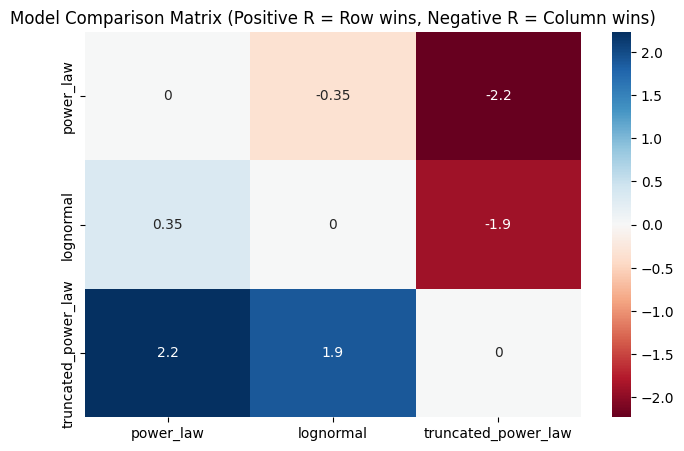

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a comparison matrix of R-values
models = ['power_law', 'lognormal', 'truncated_power_law']
matrix_data = []

for m1 in models:
    row = []
    for m2 in models:
        if m1 == m2:
            row.append(0) # No comparison with itself
        else:
            R, p = results.distribution_compare(m1, m2)
            row.append(R)
    matrix_data.append(row)

# Plot as a Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(matrix_data, annot=True, xticklabels=models, yticklabels=models, 
            cmap="RdBu", center=0)
plt.title("Model Comparison Matrix (Positive R = Row wins, Negative R = Column wins)")
plt.show()

Assuming nested distributions
Assuming nested distributions


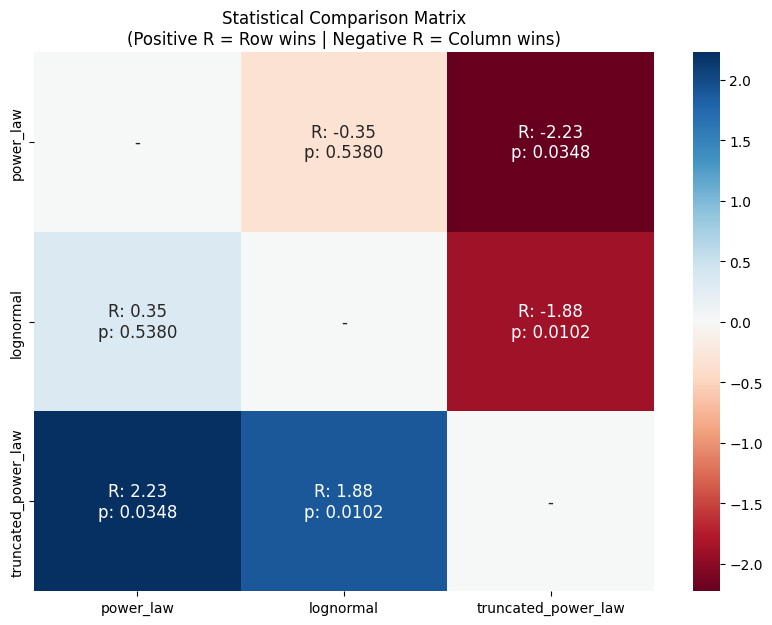

In [57]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define the models to compare
models = ['power_law', 'lognormal', 'truncated_power_law']
n = len(models)

# 2. Create empty matrices for the colors (R) and the text labels (R + p)
r_matrix = np.zeros((n, n))
label_matrix = np.empty((n, n), dtype=object)

# 3. Fill the matrices
for i, m1 in enumerate(models):
    for j, m2 in enumerate(models):
        if i == j:
            r_matrix[i, j] = 0
            label_matrix[i, j] = "-" # Diagonal
        else:
            # results is your powerlaw.Fit object
            R, p = results.distribution_compare(m1, m2)
            r_matrix[i, j] = R
            # \n creates a new line inside the cell
            label_matrix[i, j] = f"R: {R:.2f}\np: {p:.4f}"

# 4. Create the plot
plt.figure(figsize=(10, 7))
sns.heatmap(r_matrix, 
            annot=label_matrix,  # Use our custom strings as labels
            fmt="",              # Necessary when passing strings to annot
            cmap="RdBu",         # Red for negative, Blue for positive
            center=0,            # Ensure 0 is the neutral color
            xticklabels=models, 
            yticklabels=models,
            annot_kws={"size": 12})

plt.title("Statistical Comparison Matrix\n(Positive R = Row wins | Negative R = Column wins)")
plt.show()